# Coding Exercise - Plotting mean annual NDVI over a 3-year period

* **Products used:** 
[ls8_sr](https://explorer.digitalearth.africa/ls8_sr), [ls7_sr](https://explorer.digitalearth.africa/ls7_sr), [ls5_sr](https://explorer.digitalearth.africa/ls5_sr)

## Background
Glenn James' coding exercise as part of the application to the Earth observation data scientist role.

## Description
This notebook involves finding and then plotting the annual mean NDVI for a given location at a given time, with explanations behind each analysis step.

Process:
1. Load landsat data for the given region and time (Step 3)
2. Calculate NDVI using the loaded dataset (Step 4)
3. Find yearly average of the NDVI (Step 5)
4. Plot annual mean NDVI over time (Step 6)


***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [1]:
%matplotlib inline

import datacube
import xarray as xr
import matplotlib.pyplot as plt

from deafrica_tools.datahandling import load_ard, mostcommon_crs
from deafrica_tools.plotting import rgb
from deafrica_tools.bandindices import calculate_indices

/env/lib/python3.8/site-packages/datacube/storage/masking.py:7: DeprecationWarning: datacube.storage.masking has moved to datacube.utils.masking
  warnings.warn("datacube.storage.masking has moved to datacube.utils.masking",
/env/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


### Connect to the datacube

In [2]:
dc = datacube.Datacube(app='DEAfrica_coding')

### Step 3: Loading Landsat data

We want to import Landsat data for the period 2018-2020 around a central latitude and longitude 13.94, -16.54. 
Here we choose a small region (approx 5kmx5km) around this centre location.
This size is chosen for a short computation time.

The dataset is loaded using load_ard, loading data from the recent landsat satellites, landsat 5, 7 and 8, and using 30x30m pixels (spatial resolution for landsat 5 and 7).
We will need the red and near-infrared bands for the calculation of the NDVI, so these bands are loaded.


In [3]:
#set location, length and width of the region
lat, lon = 13.94, -16.54
lat_width, lon_width = 0.05, 0.05 

#load dataset
ds = load_ard(dc=dc,
              products=['ls5_sr',
                        'ls7_sr',
                        'ls8_sr'],
              x=(lon-lon_width/2, lon+lon_width/2),
              y=(lat-lat_width/2, lat+lat_width/2),
              time=('2018-01', '2020-12'),
              measurements = ['red','nir'],
              output_crs='epsg:6933', #projection system
              resolution=(-30, 30),
              group_by='solar_day')

print(ds)

Using pixel quality parameters for USGS Collection 2
Finding datasets
    ls5_sr
    ls7_sr
    ls8_sr
Applying pixel quality/cloud mask
Re-scaling Landsat C2 data
Loading 129 time steps
<xarray.Dataset>
Dimensions:      (time: 129, x: 162, y: 208)
Coordinates:
  * time         (time) datetime64[ns] 2018-01-08T11:29:32.066562 ... 2020-12...
  * y            (y) float64 1.764e+06 1.764e+06 ... 1.758e+06 1.758e+06
  * x            (x) float64 -1.598e+06 -1.598e+06 ... -1.593e+06 -1.593e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) float32 0.0414225 0.03859 ... 0.07557751 0.09183
    nir          (time, y, x) float32 0.19324999 0.1809025 ... 0.16987501
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref


### Step 4: Calculating NVDI
NDVI measures the density of plant growth in an area, with a low value of -1 corresponding to very low plant growth areas, and a value of 1 corresponding to very green areas.
This is calculated from the red and near-infrared landsat bands using the following formula:

\begin{align}
    NDVI &= \frac{nir - red}{nir + red}
\end{align}

This can be evaluated using the calculate_indices function for NDVI, where the collection is set to 'c2' as we are using landsat data.

In [4]:
# calculate NDVI for landsat bands
ds_ndvi = calculate_indices(ds, index=['NDVI'], collection='c2')

### Step 5: Resample to annual data
Here the mean value of the data for each year is found (2018, 2019 and 2020) and placed in a new dataset.
We do these by resampling the data at the first day of each year, and setting this to the average value at each year.
> **Note:** This process sets the time entry to the 1st of January for each of the respective years.

In [5]:
ds_ndvi_ann = ds_ndvi.resample(time="AS").mean()

### Step 6: Plotting annual mean NDVI 
The annual mean NDVI for the region is plotted across the years 2018, 2019 and 2020.

Each timestep in the dataset is plotted by setting the data to be plotted as col = "time". 
The minimum and maximum ndvi values are set to get greater constrast with minimal information loss.
The colour map for the plots are set to red to green, characteristic of NDVI which shows liveliness of vegetation.

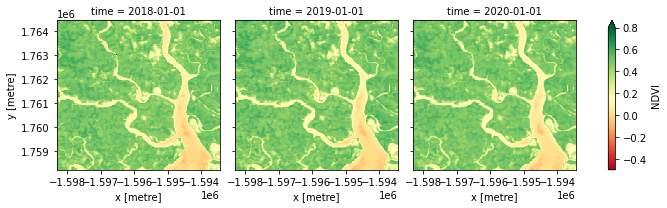

In [6]:
#Plotting
ds_ndvi_ann.NDVI.plot(col='time', vmin=-0.50, vmax=0.8, cmap='RdYlGn')

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:** 

In [7]:
print(datacube.__version__)

1.8.5


**Last Tested:**

In [8]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2021-09-26'